## Simple Linear Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf

In [2]:
boston_raw = load_boston()
print(boston_raw.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_data = np.column_stack([boston_raw.data, boston_raw.target])
col_names = np.append(boston_raw.feature_names, 'MEDV')

boston = pd.DataFrame(boston_data, columns = col_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.shape

(506, 14)

In [6]:
boston_clean = boston.dropna()
boston_clean.shape

(506, 14)

Let's start by using the `statsmodels` module to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. The basic syntax is `smf.ols('y~x', data)`, where `y` is the response, `x` the predictor, and `data` is the data frame in which these two variables are kept.

In [8]:
lm_fit = smf.ols('MEDV~LSTAT', boston).fit()

To print some information about the model, we use the `summary()` method. This gives us p-values and standard errors for the coefficients, as well as the $R^2$ statistic and F-statistic for the model.

In [9]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        08:03:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can access many of this values directly, for example, to get a list of the parameters:

In [10]:
lm_fit.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In order to obtain a 95% confidence interval for the coefficient estimates, we can use the `conf_int()` method.

In [11]:
lm_fit.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


The fitted values of the model are stored in `lm_fit.fittedvalues`

The `statsmodels` module can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat` (predictions).

In [12]:
predictors = pd.DataFrame({'LSTAT':[5,10,15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


For instance, the 95 % confidence interval associated with a lstat value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

We will now plot medv and lstat along with the least squares regression line using the plot() function.

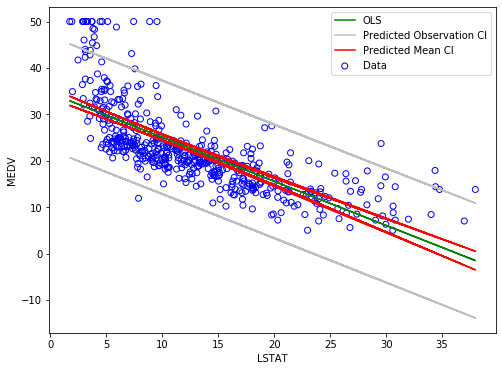

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(boston.LSTAT, boston.MEDV, facecolors='none', edgecolors='b', label="Data")
ax.plot(boston.LSTAT, lm_fit.fittedvalues, 'g', label="OLS")

predictions = lm_fit.get_prediction(boston).summary_frame(alpha=0.05)

ax.plot(boston.LSTAT, predictions.obs_ci_lower, color='0.75', label="Predicted Observation CI")
ax.plot(boston.LSTAT, predictions.obs_ci_upper, color='0.75', label="")

ax.plot(boston.LSTAT, predictions.mean_ci_lower, color='r',label="Predicted Mean CI")
ax.plot(boston.LSTAT, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Three important diagnostic plots are implemented below:

In [14]:
from statsmodels.stats.outliers_influence import OLSInfluence

resid_t = OLSInfluence(lm_fit).resid_studentized_external

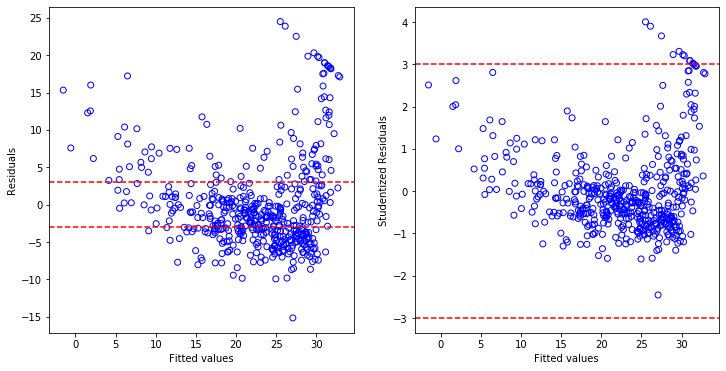

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b')
axes[0].set_ylabel('Residuals')

axes[1].scatter(lm_fit.fittedvalues, resid_t, facecolors='none', edgecolors='b')
axes[1].set_ylabel('Studentized Residuals')

for i in range(2):
    axes[i].set_xlabel('Fitted values')
    axes[i].axhline(y=3, color='r', linestyle='dashed')
    axes[i].axhline(y=-3, color='r', linestyle='dashed')
# |studentized residual| > 3 are generally considered outliers

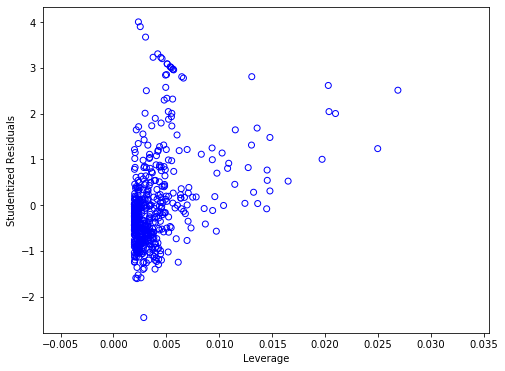

In [16]:
leverage = OLSInfluence(lm_fit).hat_matrix_diag

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(leverage, resid_t, facecolors='none', edgecolors='b')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

To asses the normality of the residuals we can use a Normal Probability plot.

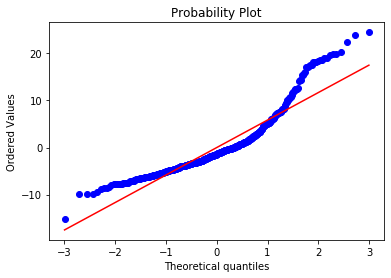

In [17]:
from scipy.stats import probplot

_ = probplot(lm_fit.resid, plot=plt)

## Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the statsmodels module. The syntax `smf.ols('y~x1+x2+x3, data)` is used to fit a model with three predictors, `x1`, `x2`, and `x3`. The `summary()` function now outputs the regression coefficients for all the predictors.

In [18]:
lm_fit = smf.ols('MEDV~LSTAT+AGE', boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           2.98e-88
Time:                        08:03:29   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `Boston` data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [19]:
preds = boston.columns.tolist()
preds.remove('MEDV')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [20]:
lm_ins = smf.ols(my_formula, boston)
lm_fit = lm_ins.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        08:03:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can access the individual components of a summary object by name.

In [21]:
lm_fit.rsquared

0.7406426641094095

In [22]:
rse = np.sqrt(lm_fit.mse_resid)
rse

4.745298181699631

statsmodels can also be used to compute variance inflation factors. Most VIF’s are low to moderate for this data.

One recommendation is that if VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vifs = [(predictor, variance_inflation_factor(lm_ins.exog, idx)) 
        for (idx, predictor) in enumerate(lm_ins.exog_names)]

print('Variance Inflation Factors')
for tup in vifs:
    print('{:10}'.format(tup[0]), '{:.3f}'.format(tup[1]))

Variance Inflation Factors
Intercept  585.265
CRIM       1.792
ZN         2.299
INDUS      3.992
CHAS       1.074
NOX        4.394
RM         1.934
AGE        3.101
DIS        3.956
RAD        7.484
TAX        9.009
PTRATIO    1.799
B          1.349
LSTAT      2.941


What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [25]:
preds = boston.columns.tolist()
preds.remove('MEDV')
preds.remove('AGE')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [26]:
lm_fit1 = smf.ols(my_formula, boston).fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          6.08e-136
Time:                        08:03:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction Terms

It is easy to include interaction terms in a linear model. The syntax lstat:black tells statsmodels to include an interaction term between lstat and black. The syntax lstat*age simultaneously includes lstat, age,
and the interaction term lstat×age as predictors; it is a shorthand for lstat+age+lstat:age.

In [27]:
smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           4.86e-88
Time:                        08:03:29   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of the Predictors

statsmodel can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using `I(X**2)`.

In [28]:
from statsmodels.stats.api import anova_lm

In [29]:
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          1.56e-112
Time:                        08:03:29   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [30]:
lm_fit = smf.ols('MEDV ~ LSTAT', boston).fit()
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston).fit()

anova_lm(lm_fit, lm_fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, lstat, while Model 2 corresponds to the larger quadratic model that has two 2 predictors, lstat and lstat^2. The anova_lm() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only
contains the predictor lstat . This is not surprising, since earlier we saw evidence for non-linearity in the relationship between medv and lstat. If we plot the residuals for Model 2, there is little discernible pattern in the residuals.

Text(0, 0.5, 'MEDV')

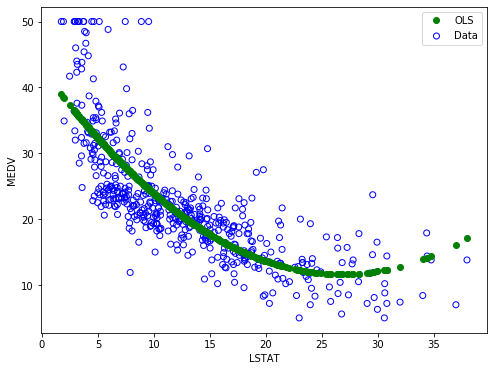

In [31]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(boston.LSTAT, boston.MEDV, facecolors='none', edgecolors='b', label="Data");
ax.plot(boston.LSTAT, lm_fit2.fittedvalues, 'g', marker='o',linestyle='none', label="OLS");

ax.legend(loc='best')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0.5, 0, 'Fitted values')

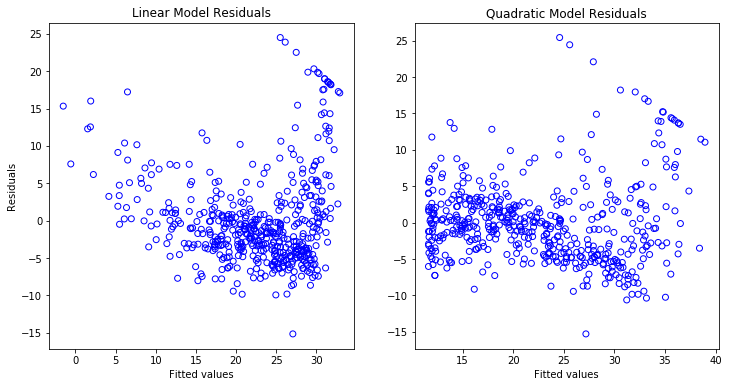

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Linear Model Residuals')

ax2.scatter(lm_fit2.fittedvalues, lm_fit2.resid, facecolors='none', edgecolors='b');
ax2.set_title('Quadratic Model Residuals')
ax2.set_xlabel('Fitted values')

In order to create a cubic fit, we can include a predictor of the form I(X**3). However, this approach can start to get cumbersome for higher-order polynomials. A better approach is the following:

In [33]:
formula = 'MEDV ~ LSTAT +' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(2, 6))
formula

'MEDV ~ LSTAT +I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)'

In [34]:
lm_fit5 = smf.ols(formula, boston).fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          8.73e-122
Time:                        08:03:30   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(LSTAT ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(LSTAT ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(LSTAT ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(LSTAT ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant p-values in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [35]:
smf.ols('MEDV ~ np.log(LSTAT)', boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          9.28e-122
Time:                        08:03:30   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

We will now examine the Carseats data. We will attempt to predict Sales (child car seat sales) in 400 locations
based on a number of predictors.

In [36]:
carseats = pd.read_csv('data/Carseats.csv', index_col = 0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The Carseats data includes qualitative predictors such as `ShelveLoc`, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor `ShelveLoc` takes on three possible values, Bad, Medium, and Good.

Given a qualitative variable such as `Shelveloc`, `statsmodels` generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [37]:
preds = carseats.columns.tolist()[1:]
formula ='Sales ~ ' + ' + '.join(preds) + ' + Income:Advertising + Price:Age'
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age'

In [38]:
lm_fit = smf.ols(formula, carseats).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 21 Feb 2020   Prob (F-statistic):          6.14e-166
Time:                        08:03:30   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R has created a ShelveLoc[T.Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[T.Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for ShelveLoc[T.Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[T.Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.